# Train a neural network classifier for XOR gate
### Total 3 layers 
- Input
- Hidden (6 nodes) 
- output (1 node)

### Activation function:
- Sigmoid

In [156]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [92]:
#Training data XOR gate
#input
x = np.array([[1,1],[1,0],[0,1],[0,0]],dtype=np.float128)

#output
y = np.array([[0,1,1,0]],dtype=np.float128)
y=y.T

(4, 1)

Error: 0.49823608906145611108
Error: 0.046057890490246278237
Error: 0.02634008901286700316
Error: 0.019794899626095516926
Error: 0.0163316005765196115
Error: 0.014129882971748945059
Error: 0.012582321908864812013
Error: 0.011422957127306921157
Error: 0.010515188345050262633
Error: 0.0097809766633749784664
[[0.01199634]
 [0.99010599]
 [0.99006645]
 [0.00486511]]


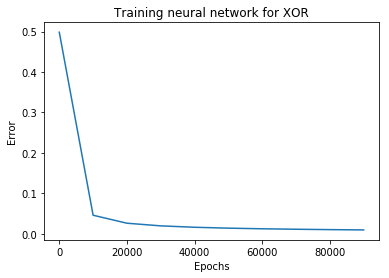

In [165]:
# input -> hidden layer -> output
# activation sigmoid


# hidden layer with 6 nodes W =6x2 b =1x6
W_1 = np.random.rand(6,2)
b_1 = np.random.rand(1,6)

#output layer W = 1x6 b = 1x6

W_2 = np.random.rand(1,6)
b_2 = np.random.rand(1,1)


W = {0: W_1,1: W_2}
b = {0: b_1, 1: b_2}

def sigmoid(x):
    """ Activation Function.
    
    :param x: input value or vector
    :returns: 1/(1+np.exp(-x))
    """
    
    return 1.0/(1.0 + np.exp(- x))



def sigmoid_prime(x):
    """Derivative of activation function
    
    :param x: input value or vector
    :returns: sigmoid(x)*(1.0- sigmoid(x))
    """
    
    return sigmoid(x)*(1.0- sigmoid(x))



def forward_pass(x,W,b):
    """Runs the inputs through all the layers(forward pass)
    
    :param x: input data(batch data)
    :param W: Weights dictionary for all the layers
    :param b: Bias dictionary for all the layers
    
    :returns Z,H: x.W +b, f(x.W +b) for all the layers
    """
    
    Z ={}
    H ={}
    for i in range(len(W)):
        if i == 0:
            Z[i] = np.dot(x,W[i].T) + b[i]
        else:
            Z[i] = np.dot(H[i-1],W[i].T) + b[i]
        
        #activity
        H[i] = sigmoid(Z[i]) 
    
    return Z,H


def train(x,W,b,y,lr=0.1):
    """Train the classifier
    
    :param x: input data(batch data)
    :param W: Weights dictionary for all the layers
    :param b: Bias dictionary for all the layers
    :param y: true values 
    :param lr: learning rate
    
    :returns W,b: final weights and bises dictionary for al the layers
    """
    
    errortrack =[]
    for i in range(100000):
        Z,H = forward_pass(x,W,b)
        
#         print(H)
        
        #error calculation
        layer2_error = (y - H[1])
        if i%10000 == 0:
            error = np.mean(abs(layer2_error))
            errortrack.append((error,i))
            print("Error:",error)
        
        layer2_delta = layer2_error*sigmoid_prime(Z[1])
        
        layer1_error = np.dot(layer2_delta,W[1])
        layer1_delta = layer1_error*sigmoid_prime(Z[0])
        
        #update the weight and bias
        W[1] += lr*np.dot(layer2_delta.T,H[0])
        b[1] += lr*np.sum(layer2_delta,axis=0, keepdims=True)
        
        
        
        
        W[0] += lr*np.dot(layer1_delta.T,x)
        b[0] += lr*np.sum(layer1_delta, axis=0, keepdims=True)

       
    print(H[1])
    err, epoch = zip(*errortrack)
    plt.plot(epoch,err)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Training neural network for XOR")
    plt.show()
    return W,b


    
W,b =train(x,W,b,y)



In [153]:
#Test run
Z,H = forward_pass(np.array([0,0]), W, b)
H[1]
                  

array([[0.00627565]])